<a href="https://colab.research.google.com/github/elavens/PyMe/blob/main/K_means_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
data = pd.read_excel('/content/drive/MyDrive/read.xlsx')
print(data)

    X   Y
0   3   7
1   2  10
2   2  10
3  15   7
4   2  10
5   3   7


In [7]:
x_values = data['X'].tolist()
y_values = data['Y'].tolist()


X = [[x, y] for x, y in zip(x_values, y_values)]

print('X=' ,X)

X= [[3, 7], [2, 10], [2, 10], [15, 7], [2, 10], [3, 7]]


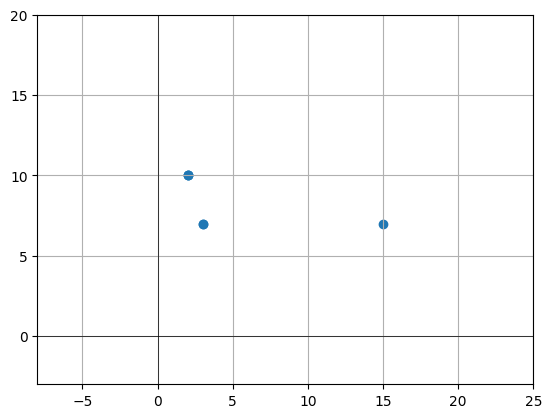

In [9]:
#plotting the datapoint before clustering

x = data['X']
y = data['Y']
plt.scatter(x, y)
plt.grid(True)
plt.xlim(min(x) - 10, max(x) + 10)
plt.ylim(min(y) - 10, max(y) + 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Display grid lines at every unit
# plt.xticks(range(int(min(x)) - 10, int(max(x)) + 11))
# plt.yticks(range(int(min(y)) - 10, int(max(y)) + 11))

In [11]:
# k-means clustering er main kajgulo ei module a.. implementation of k means clustring from scratch

def distance(point1, point2):
    return sum([(x - y) ** 2 for x, y in zip(point1, point2)])

def assign_labels(X, centroids):
    labels = []
    for point in X:
        distances = [distance(point, centroid) for centroid in centroids]
        cluster_label = distances.index(min(distances))
        labels.append(cluster_label)
    return labels

def update_centroids(X, labels, k):
    centroids = []
    for i in range(k):
        cluster_points = [X[j] for j in range(len(X)) if labels[j] == i]
        centroid = [sum(coord) / len(cluster_points) for coord in zip(*cluster_points)]
        centroids.append(centroid)
    return centroids

def kmeans(X, k, max_iterations=100):
    # Randomly initialize centroids
    centroids = X[:k]

    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        labels = assign_labels(X, centroids)

        # Update centroids based on the mean of the assigned data points
        new_centroids = update_centroids(X, labels, k)

        # If centroids have not changed, convergence reached
        if centroids == new_centroids:
            break



        centroids = new_centroids

    return labels, centroids


k = int(input("Enter the number of cluster(k): "))

labels, centroids = kmeans(X, k)
labels = [label + 1 for label in labels]


# Group the data points by their cluster label
clusters = [[] for _ in range(k)]
for i, point in enumerate(X):
    cluster_label = labels[i]
    clusters[cluster_label - 1].append(point)

# Print the clusters with their data points
for i, cluster in enumerate(clusters):
    print("Cluster", i + 1, ":", cluster)



print("Final centroids:", centroids)

Enter the number of cluster(k): 2
Cluster 1 : [[15, 7]]
Cluster 2 : [[3, 7], [2, 10], [2, 10], [2, 10], [3, 7]]
Final centroids: [[15.0, 7.0], [2.4, 8.8]]


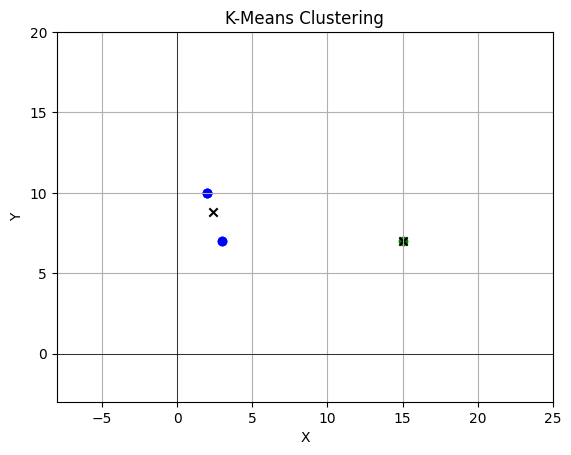

In [12]:
#graph after clustering

colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i, point in enumerate(X):
    plt.scatter(point[0], point[1], c=colors[labels[i]])

# Plotting the final centroids
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], c='black', marker='x')

plt.grid(True)

plt.xlim(min(x) - 10, max(x) + 10)
plt.ylim(min(y) - 10, max(y) + 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)


plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.show()

[[ 3  7]
 [ 2 10]
 [ 2 10]
 [15  7]
 [ 2 10]
 [ 3  7]]


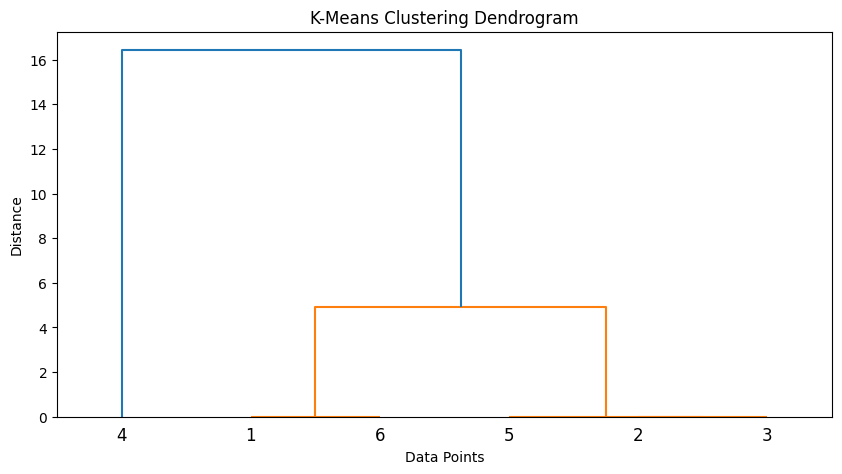

In [14]:
X = np.array(X)
print(X)

# Perform k-means clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title('K-Means Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(Z, labels=np.arange(1, X.shape[0]+1))
plt.show()